In [14]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [18]:
df = pd.read_csv('data/mens_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [19]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [20]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

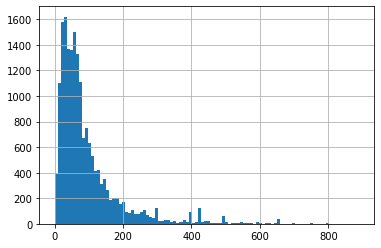

In [21]:
df['prices_amountmin'].hist(bins=100)

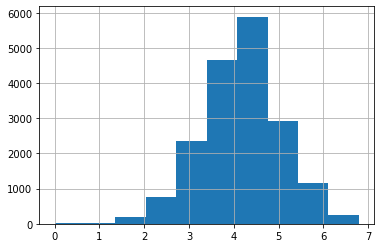

In [22]:
np.log( df['prices_amountmin'] + 1).hist()

In [23]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

In [24]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [25]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) ) 

y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [26]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [27]:
df.brand.value_counts()

Nike               1709
PUMA                574
Ralph Lauren        524
New Balance         361
VANS                356
                   ... 
Key Apparel           1
Fat Doxie             1
Concepts Sports       1
Cabela's              1
Xray, XRay            1
Name: brand, Length: 1856, dtype: int64

In [28]:
df.brand.factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [29]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [30]:
df['brand_cat'] = df['brand'].factorize()[0]

In [31]:
feats = ['brand_cat']

X = df[feats].values
y = df['prices_amountmin'].values

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [34]:
def run_model(feats):


  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

  return np.mean(scores), np.std(scores)

In [35]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [40]:
df.manufacturer.value_counts()

Puma                         476
Nike                         374
New Balance                  249
VANS                         170
Reebok                       128
                            ... 
Original S.W.A.T               1
OluKai                         1
Zanzara                        1
Complete Medical Supplies      1
HEAD                           1
Name: manufacturer, Length: 618, dtype: int64

In [41]:
df.manufacturer.factorize()

(array([-1, -1, -1, ..., -1, -1, -1]),
 Index(['Maui And Sons', 'Twisted X', 'Puma', 'Filament', 'Robert Wayne',
        'Roper', 'Puentes Denver', 'Elan Polo', 'SoftScience', 'Dr. Martens',
        ...
        'MF Western', 'Luxottica', 'Minav Corp.', 'Rainbow Sandals',
        'Muck Boots', 'AH by Android Homme', 'Rubies Costume Co', 'Vasque',
        'POLO Ralph Lauren', 'HEAD'],
       dtype='object', length=618))

In [42]:
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [43]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [44]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.53930419908595, 4.311223231615442)

In [ ]:
!git add Matrix1/day4